In [1]:
"""
cfg.py 

Simulation configuration for S1 model (using NetPyNE)
This file has sim configs as well as specification for parameterized values in netParams.py 

Contributors: salvadordura@gmail.com, fernandodasilvaborges@gmail.com
"""
# import matplotlib
import neuron
from netpyne import specs, sim

%matplotlib inline

cfg = specs.SimConfig()  

cfg.duration = 5.0*1e3 ## Duration of the sim, in ms  
cfg.dt = 0.025
cfg.seeds = {'conn': 4321, 'stim': 4321, 'loc': 4321} 
cfg.hParams = {'celsius': 34, 'v_init': -71}  
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True  

In [2]:
#--------------------------------------------------------------------------
# Recording 
#--------------------------------------------------------------------------

cellName = 'L23_PC_cADpyr_1' # L23_PC_cADpyr_1_cellParams.json

cfg.allpops = [cellName]

cfg.recordCells = cfg.allpops # record all cells                
cfg.recordTraces = {'V_soma': {'sec':'soma_0', 'loc':0.5, 'var':'v'},
                    'V_axon_0': {'sec':'axon_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_0': {'sec':'Myelin_0', 'loc':0.5, 'var':'v'},
                    'V_Myelin_1': {'sec':'Myelin_1', 'loc':0.5, 'var':'v'},
                    'V_Myelin_10': {'sec':'Myelin_10', 'loc':0.5, 'var':'v'},
                    'V_Node_0': {'sec':'Node_0', 'loc':0.5, 'var':'v'},
                    'V_Node_1': {'sec':'Node_1', 'loc':0.5, 'var':'v'},
                    'V_Node_10': {'sec':'Node_10', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_0': {'sec':'Unmyelin_0', 'loc':0.5, 'var':'v'},
                    'V_Unmyelin_10': {'sec':'Unmyelin_10', 'loc':0.5, 'var':'v'},
                    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
                    # 'V_apic_5': {'sec':'apic_5', 'loc':0.5, 'var':'v'},
                    # 'V_apic_95': {'sec':'apic_95', 'loc':0.5, 'var':'v'},                
                    # 'V_dend_0': {'sec':'dend_0', 'loc':0.5, 'var':'v'},
                    # 'V_dend_65': {'sec':'dend_65', 'loc':0.5, 'var':'v'},
                    # 'V_Node_113': {'sec':'Node_113', 'loc':0.5, 'var':'v'},
                    }

cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.025  

cfg.analysis['plotTraces'] = {'include': cfg.recordCells, 'oneFigPer': 'cell', 'overlay': True, 'saveFig': False, 'showFig': False, 'figSize':(18,12)} #'timeRange': [2000,cfg.duration], 


In [3]:
#------------------------------------------------------------------------------
# Saving
#------------------------------------------------------------------------------
cfg.simLabel = cellName
cfg.saveFolder = '../data/singleCelltest/'+cfg.simLabel
cfg.savePickle = False         	## Save pkl file
cfg.saveJson = False	           	## Save json file
cfg.saveDataInclude = ['simData'] ## , 'netParams', 'simConfig', ,'simData'
cfg.backupCfgFile = None
cfg.gatherOnlySimData = False
cfg.saveCellSecs = True
cfg.saveCellConns = True

In [4]:
"""
netParams.py
"""
# Network parameters
netParams = specs.NetParams()  # object of class NetParams to store the network parameters

netParams.scale = 1.0 # Scale factor for number of cells
netParams.sizeX = 420.0 # x-dimension (horizontal length) size in um
netParams.sizeY = 1082.0 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 420.0 # z-dimension (horizontal depth) size in um
netParams.shape = 'cylinder' # cylindrical (column-like) volume

# r = 210 um and hexagonal side length = 230.9 um

In [5]:
#------------------------------------------------------------------------------
# General connectivity parameters
#------------------------------------------------------------------------------
netParams.defaultThreshold = -10.0 # spike threshold, 10 mV is NetCon default, lower it for all cells
netParams.defaultDelay = 0.1 # default conn delay (ms)
netParams.propVelocity = 300.0 #  300 μm/ms (Stuart et al., 1997)
netParams.scaleConnWeightNetStims = 0.001  # weight conversion factor (from nS to uS)

In [6]:
#------------------------------------------------------------------------------
# Population parameters
#------------------------------------------------------------------------------

netParams.popParams[cellName] = {'cellType': cellName, 'cellModel': 'HH_full', 'numCells': 1}
netParams.loadCellParamsRule(label = cellName, fileName = 'cells/'+cellName+'_cellParams.json') 
netParams.cellParams[cellName]['conds']['cellType'] = cellName


In [7]:
for sec in netParams.cellParams[cellName]['secs'].keys():
    # if netParams.cellParams[cellName]['secs'][sec]['geom']['diam'] > 0:
    try:
        if '_0' in netParams.cellParams[cellName]['secs'][sec]['topol']['parentSec']:
            print(netParams.cellParams[cellName]['secs'][sec]['topol']['parentSec'],'->',sec)
    except:
        if '_0' in netParams.cellParams[cellName]['secs'][sec]['topol']:
            print(netParams.cellParams[cellName]['secs'][sec]['topol'],'->',sec)

print()
for sec in netParams.cellParams[cellName]['secs'].keys():
    if 'Unmyelin_' in sec:
        try:
            print(netParams.cellParams[cellName]['secs'][sec]['topol']['parentSec'],'->',sec)
        except:
            print(netParams.cellParams[cellName]['secs'][sec]['topol'],'->',sec)


axon_0 -> Myelin_0
Node_0 -> Myelin_1
axon_0 -> Myelin_12
Unmyelin_0 -> Myelin_29
Unmyelin_0 -> Myelin_70
Myelin_0 -> Node_0
soma_0 -> apic_0
apic_0 -> apic_1
apic_0 -> apic_6
soma_0 -> axon_0
soma_0 -> dend_0
dend_0 -> dend_1
soma_0 -> dend_19
soma_0 -> dend_28
soma_0 -> dend_43
dend_0 -> dend_6

Node_28 -> Unmyelin_0
Node_31 -> Unmyelin_1
Node_144 -> Unmyelin_10
Node_199 -> Unmyelin_11
Node_198 -> Unmyelin_12
Node_205 -> Unmyelin_13
Node_215 -> Unmyelin_14
Node_229 -> Unmyelin_15
Unmyelin_14 -> Unmyelin_16
Node_252 -> Unmyelin_17
Unmyelin_17 -> Unmyelin_18
Node_252 -> Unmyelin_19
Node_38 -> Unmyelin_2
Node_78 -> Unmyelin_3
Node_96 -> Unmyelin_4
Node_86 -> Unmyelin_5
Node_105 -> Unmyelin_6
Node_140 -> Unmyelin_7
Node_160 -> Unmyelin_8
Node_148 -> Unmyelin_9


In [8]:
for sec in netParams.cellParams[cellName]['secs'].keys():
    if netParams.cellParams[cellName]['secs'][sec]['geom']['diam'] > 100:
        print(sec)
        print(netParams.cellParams[cellName]['secs'][sec]['geom']['pt3d'])


In [9]:
# if cellName == 'L5_TTPC2_cADpyr_1': # this cell has 'Node_113' 'diam' = 1000.0 
#     netParams.cellParams[cellName]['secs']['Node_113']['geom']['diam'] = 10.0
#     netParams.cellParams[cellName]['secs']['Node_113']['geom']['pt3d'] = [(-22.136661529541016, -6.852905750274658, -709.5120239257812, 10.0),
#     (-22.494400024414062, -7.216529846191406, -710.219970703125, 10.0),
#     (-22.545791625976562, -7.267182350158691, -710.3250122070312, 10.0)]

# if cellName == 'L6_TPC_L4_cADpyr_1': # this cell has 'Node_11' 'diam' = 1000.0 
#     netParams.cellParams[cellName]['secs']['Node_11']['geom']['diam'] = 10.0
#     netParams.cellParams[cellName]['secs']['Node_11']['geom']['pt3d'] = [[-9.777837753295898, -820.4423828125, 96.71197509765625, 10.0], [-10.025091171264648, -821.166015625, 97.35637664794922, 10.0]]

## Stimulation

In [10]:
from stimulation import make_extracellular_stimuli
from tms_tools import apply_tms

tms = 1

#------------------------------------------------------------------------
# External Stimulation
#------------------------------------------------------------------------------

cfg.addExternalStimulation = False

# The parameters of the extracellular point current source
cfg.acs_params = {'position': [0.0, -1710.0, 0.0],  # um # y = [pia, bone]
              'amp': -1250.,  # uA,
              'stimstart': 300,  # ms
              'stimend': 400.0,  # ms
              'frequency': 5,  # Hz
              'sigma': 0.57  # decay constant S/m
              }

cfg.tms_params = dict(
    freq_Hz=30.,
    duration_ms=cfg.duration,
    pulse_resolution_ms=cfg.dt,
    stim_start_ms=3000.,
    stim_end_ms=4000.,
    ef_amp_V_per_m=80.,
    width_ms=1.,
    pshape="Sine",
    decay_rate_percent_per_mm=10,
    E_field_dir=[-1, -1, -1],
    decay_dir=[0, 0, -1],
    ref_point_um=[0, 0, 0],
)

#------------------------------------------------------------------------------
# Current inputs 
#------------------------------------------------------------------------------

holding_current, step1_current, step2_current, step3_current, step4_current = -0.2, 0.1, 0.2, 0.4, 0.8
durationstim = 500
delaystim = 500
timesimulation = 1000
         
cfg.duration = 942.0 ## Duration of the sim, in ms     

cfg.addIClamp = 1

# cfg.IClamp1 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': 0, 'dur': 1300.0, 'amp': holding_current}
cfg.IClamp1 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': 0, 'dur': 1000, 'amp': step2_current}
cfg.IClamp2 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 1.0*timesimulation, 'dur': durationstim, 'amp': step2_current}
cfg.IClamp3 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 2.0*timesimulation, 'dur': durationstim, 'amp': step3_current}
cfg.IClamp4 = {'pop': cellName, 'sec': 'soma_0', 'loc': 0.5, 'start': delaystim + 3.0*timesimulation, 'dur': durationstim, 'amp': step4_current}


#------------------------------------------------------------------------------
# Current inputs (IClamp)
#------------------------------------------------------------------------------
if cfg.addIClamp:
         for key in [k for k in dir(cfg) if k.startswith('IClamp')]:
            params = getattr(cfg, key, None)
            [pop,sec,loc,start,dur,amp] = [params[s] for s in ['pop','sec','loc','start','dur','amp']]

            #cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

            # add stim source
            netParams.stimSourceParams[key] = {'type': 'IClamp', 'delay': start, 'dur': dur, 'amp': amp}

            # connect stim source to target
            netParams.stimTargetParams[key+'_'+pop] =  {
                'source': key, 
                'conds': {'pop': pop},
                'sec': sec, 
                'loc': loc}



## Run small Nets in a sigle job

In [11]:
sim.initialize(
    simConfig = cfg, 	
    netParams = netParams)  				# create network object and set cfg and net params

sim.net.createPops()               			# instantiate network populations
sim.net.createCells();              			# instantiate network cells based on defined populations
sim.net.connectCells()            			# create connections between cells based on params
sim.net.addStims() 							# add network stimulation
sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)
sim.net.defineCellShapes()

sim.runSim()                      			# run parallel Neuron simulation  


sim.gatherData()                  			# gather spiking data and cell info from each node
sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  

In [21]:
# def modifyMechsFunc(simTime):
#     from netpyne import sim

#     t = simTime

#     if t >= 937.0:
#         print(t)
#         change = True

#         sim.gatherData()
#         # sim.saveData()                    			# save params, cell info and sim output to file (pickle,mat,txt,etc)#
#         # sim.analysis.plotData()         			# plot spike raster etc

#         sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
#                                 cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
#                                 axisLabels=True, synStyle='o', 
#                                 clim= [-62, -54], showFig=False, synSize=2, saveFig='3thSpike/t%.3fsec.png' % t, figSize=(12,12));

# # -----------------------------------------------------------
# # Main code

# sim.initialize(
#     simConfig = cfg, 	
#     netParams = netParams)  # create network object and set cfg and net params

# sim.pc.timeout(300)                          # set nrn_timeout threshold to X sec (max time allowed without increasing simulation time, t; 0 = turn off)
# sim.net.createPops()               			# instantiate network populations
# sim.net.createCells()              			# instantiate network cells based on defined populations
# sim.net.connectCells()            			# create connections between cells based on params
# sim.net.addStims() 							# add network stimulation
# sim.setupRecording()              			# setup variables to record for each cell (spikes, V traces, etc)

# # Simulation option 2: interval function to modify mechanism params
# sim.runSimWithIntervalFunc(0.1, modifyMechsFunc)       # run parallel Neuron simulation (calling func to modify mechs)

## Traces

Plotting recorded cell traces ... cell


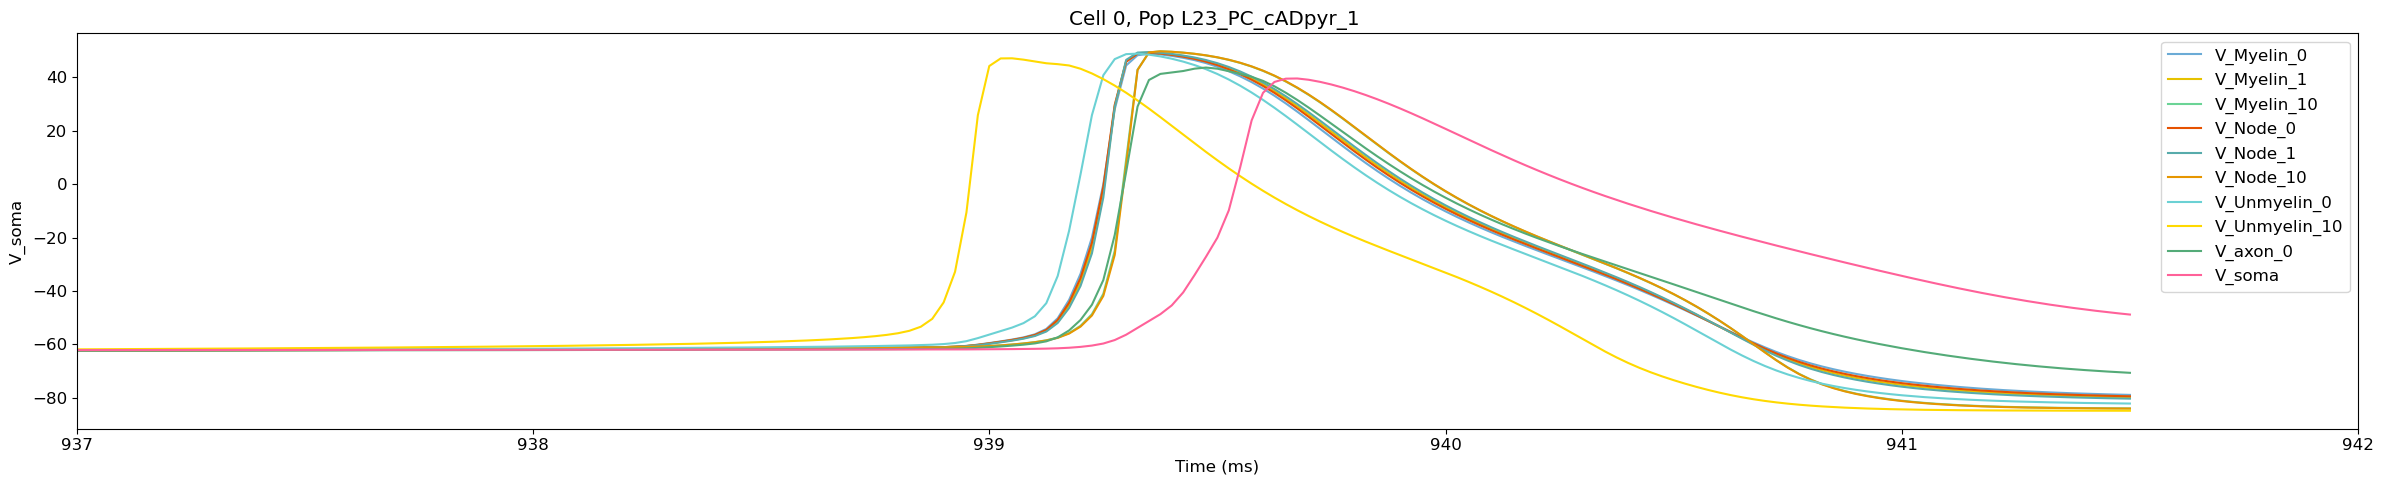

In [20]:
sim.analysis.plotTraces(timeRange=[937,942],figSize=(24,5), overlay=True);

Plotting recorded cell traces ... cell


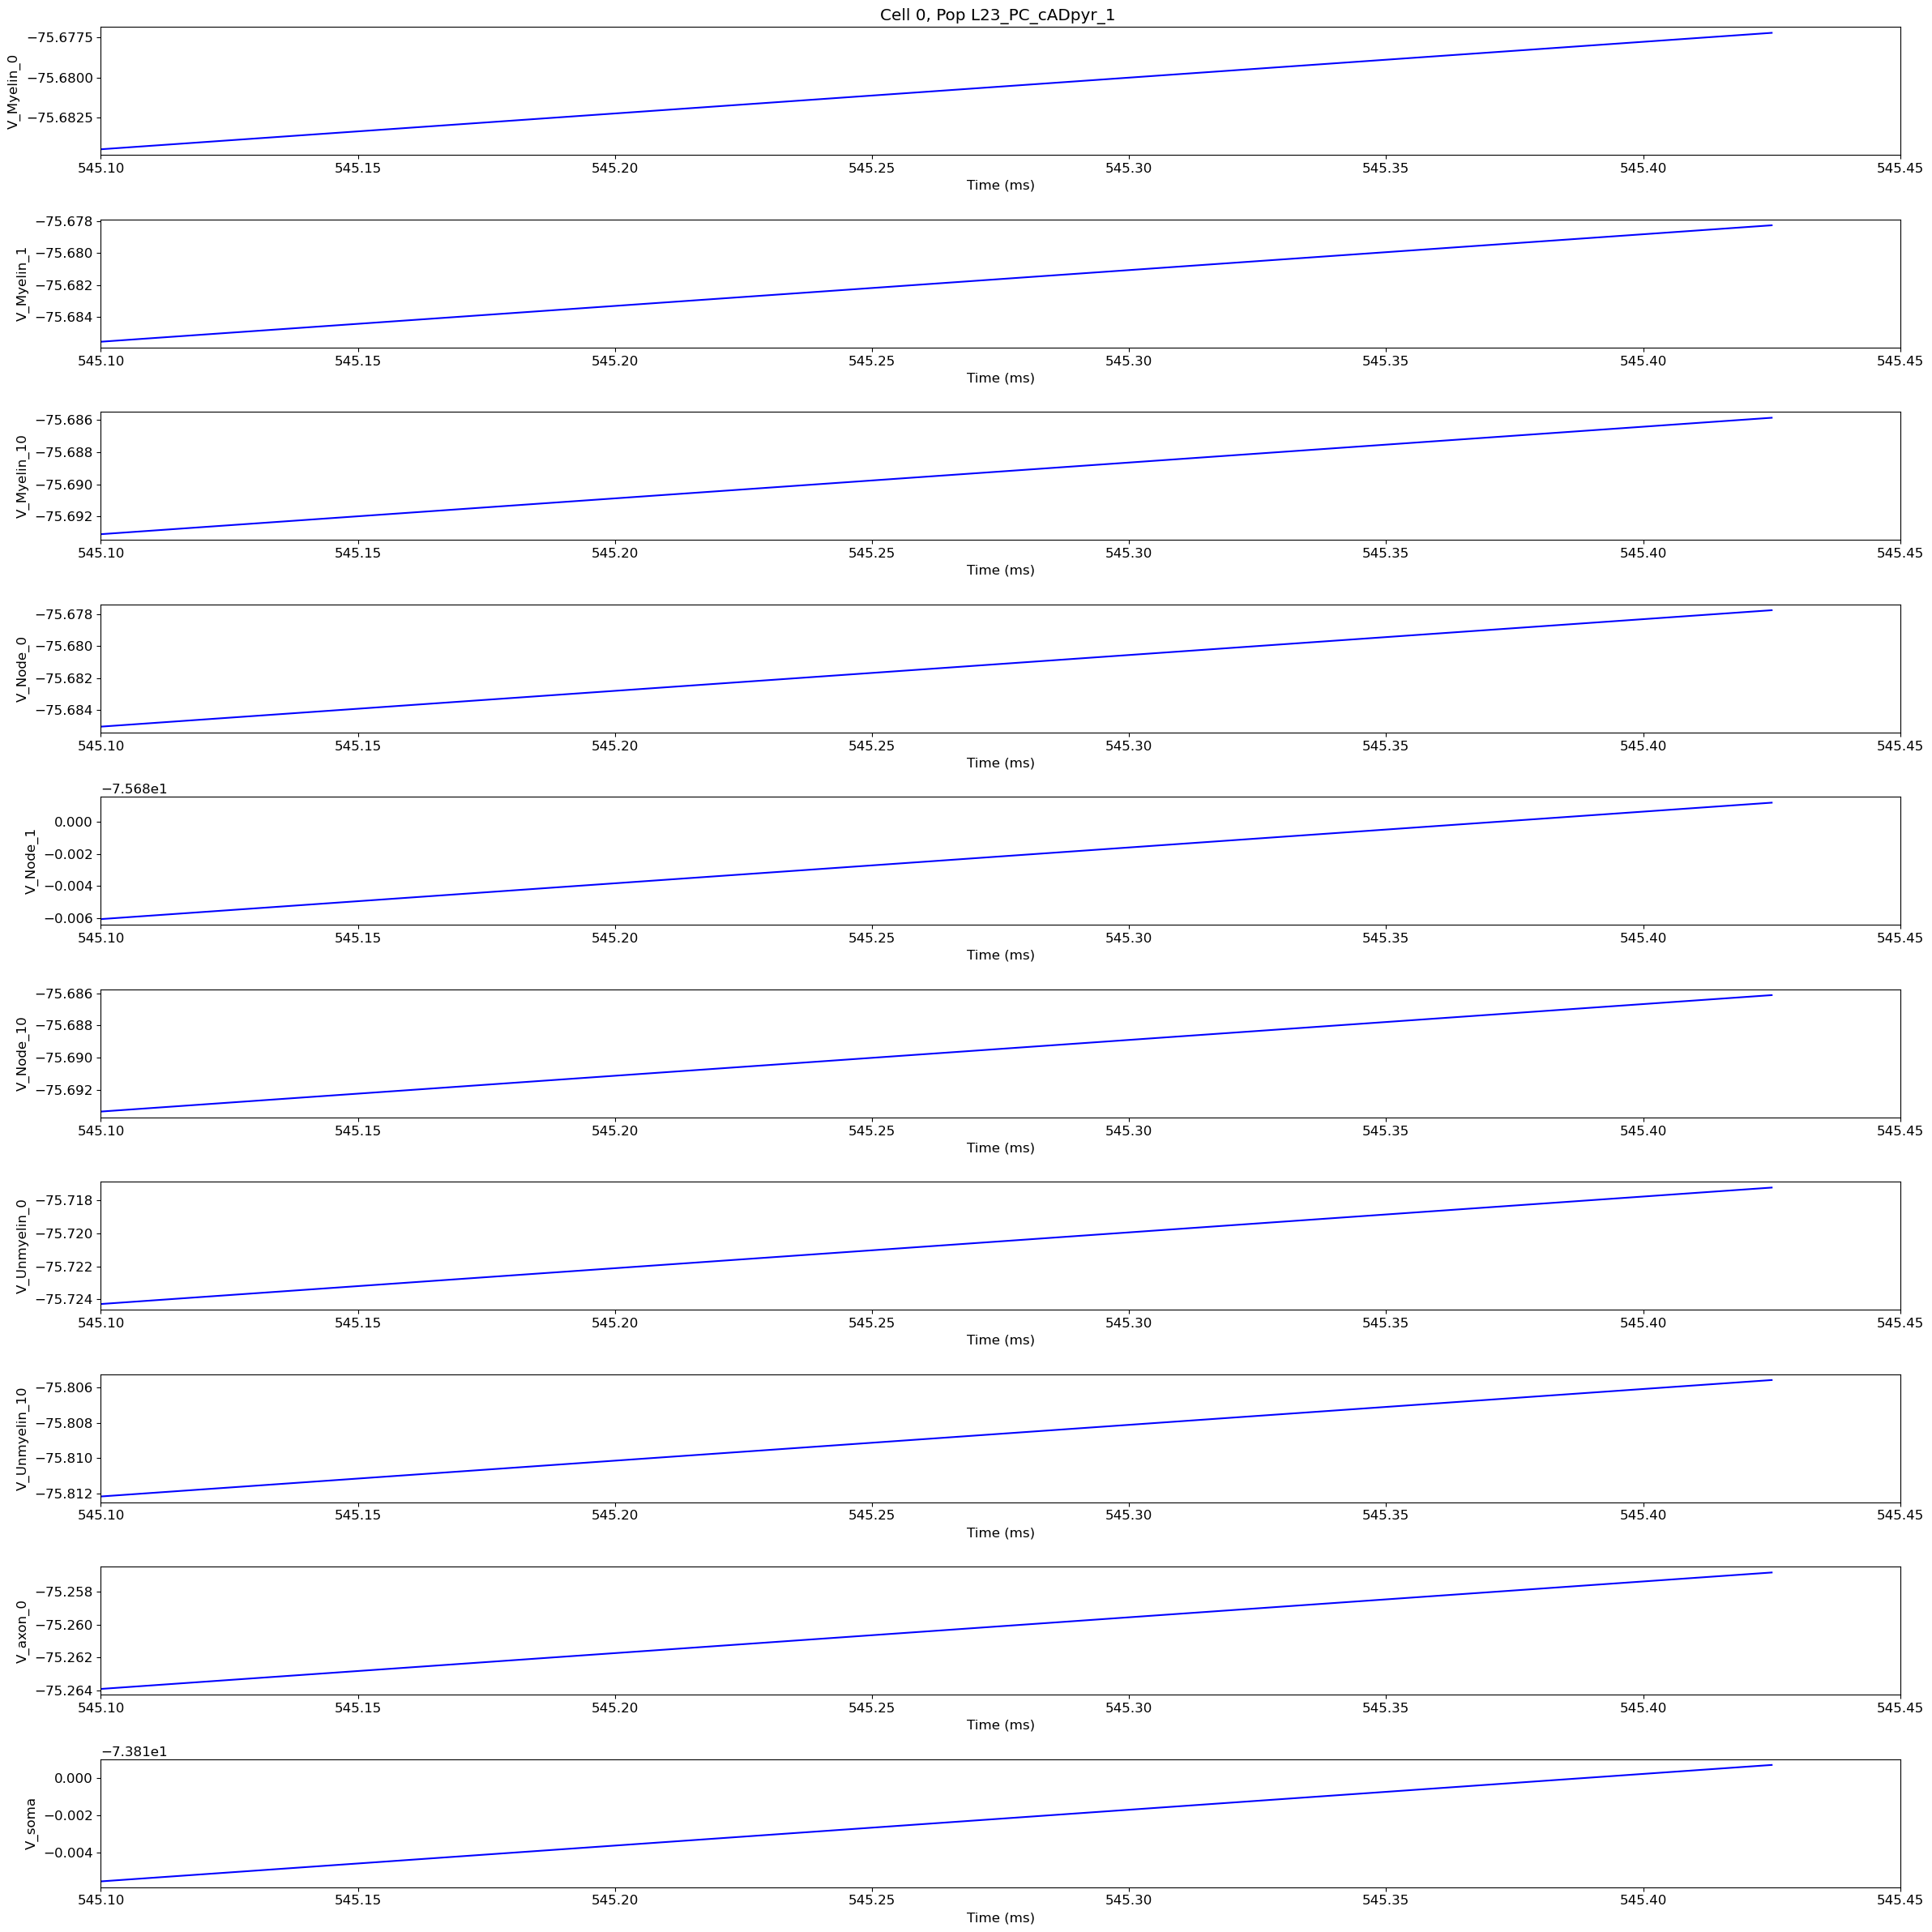

In [14]:
sim.analysis.plotTraces(timeRange=[545.1,545.45],figSize=(24,24), overlay=False, oneFigPer='cell');
# sim.analysis.plotTraces(timeRange=[3505.,3520],figSize=(24,12), overlay=False, oneFigPer='cell');

Plotting 3D cell shape ...


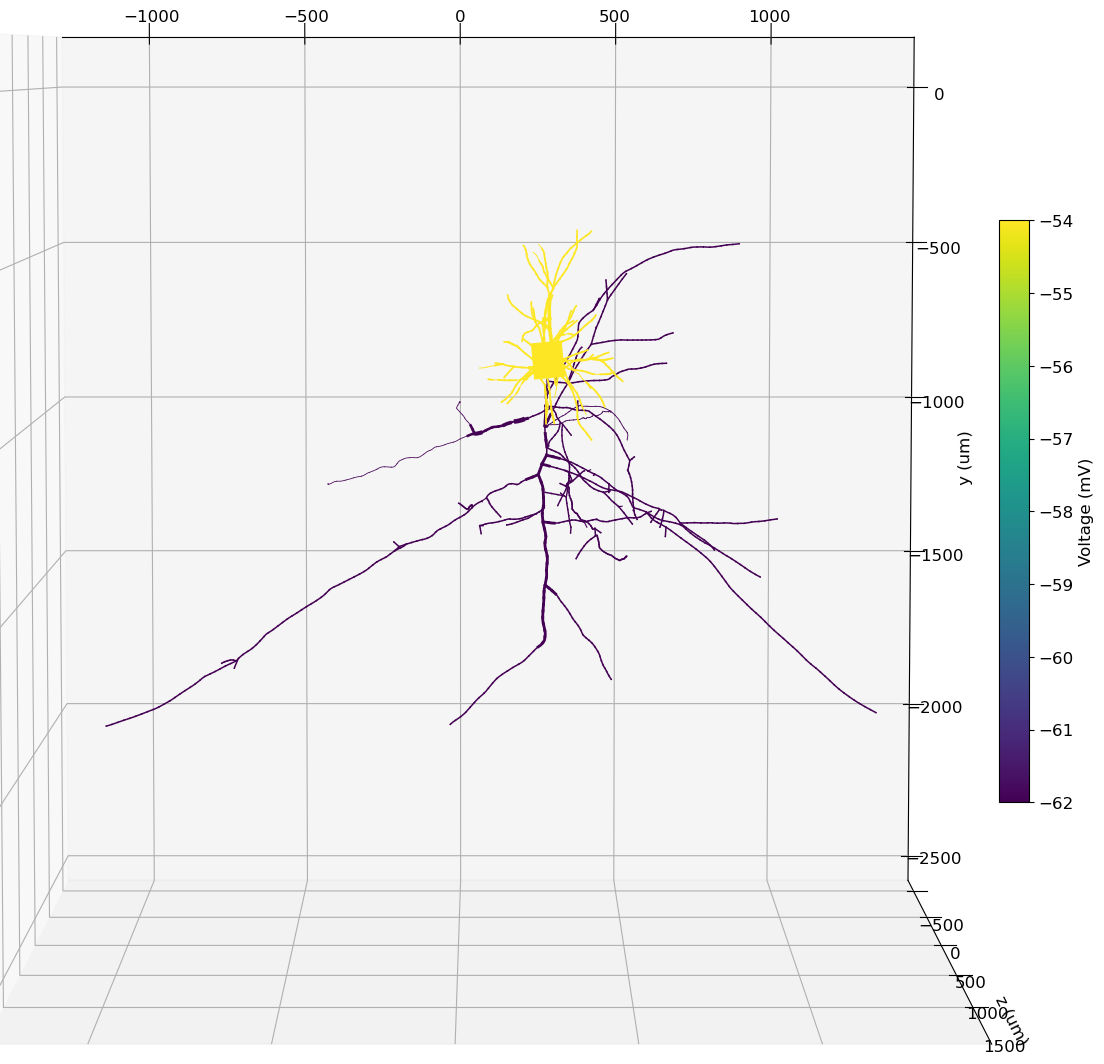

In [15]:
sim.analysis.plotShape(includePre=[cellName], includePost=[cellName], includeAxon=True, showSyns=False, showElectrodes=False,
    cvar= 'voltage', dist=0.6, elev=95, azim=-90, 
    axisLabels=True, synStyle='o', 
    clim= [-62, -54], showFig=False, synSize=2, saveFig=False, figSize=(12,12));